In [210]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plot

In [211]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [212]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [213]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

# Visualisation

<AxesSubplot:xlabel='Age', ylabel='Count'>

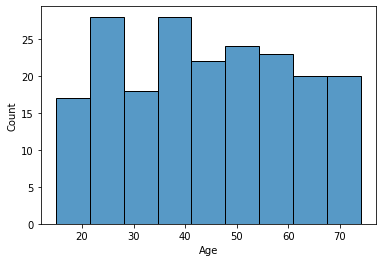

In [214]:
sb.histplot(df['Age'])

So atleast the ages in dataset have small variance

## Age vs Cholesterol

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

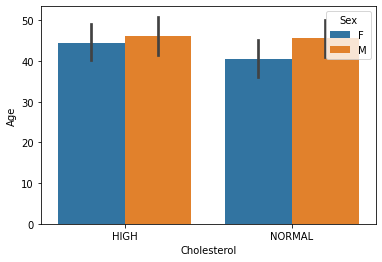

In [215]:
sb.barplot(x='Cholesterol', y='Age', data=df, hue='Sex')

## Age vs Blood Pressure

<AxesSubplot:xlabel='BP', ylabel='Age'>

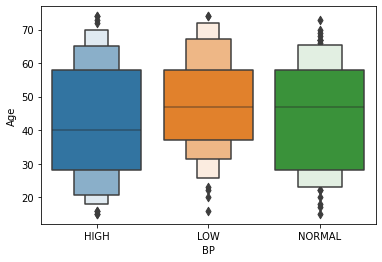

In [216]:
sb.boxenplot(x='BP', y='Age', data=df)

## Gender Ratio

<AxesSubplot:xlabel='Sex', ylabel='Count'>

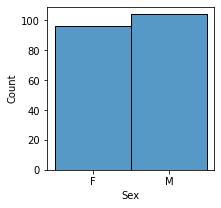

In [217]:
plot.figure(figsize=(3,3))
sb.histplot(df, x='Sex')

## Age vs Sodium to Potassium Ratio

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

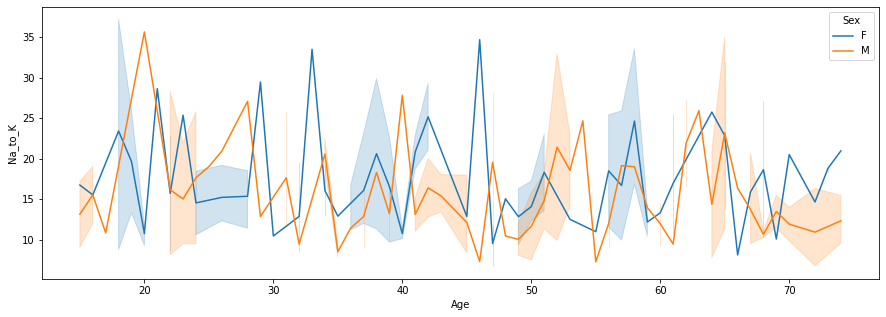

In [218]:
plot.figure(figsize=(15,5))
sb.lineplot(x='Age', y='Na_to_K', data=df, hue='Sex')

# Preprocessing

In [219]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
blood_encoder = LabelEncoder()
cholesterol_encoder = LabelEncoder()
drug_encoder = LabelEncoder()

In [220]:
df['Sex'] = gender_encoder.fit_transform(df['Sex'])
df['BP'] = blood_encoder.fit_transform(df['BP'])
df['Cholesterol'] = cholesterol_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = drug_encoder.fit_transform(df['Drug'])

In [221]:
print(df.head())
print("The datatypes are\n", df.dtypes)

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0
The datatypes are
 Age              int64
Sex              int32
BP               int32
Cholesterol      int32
Na_to_K        float64
Drug             int32
dtype: object


## Correlation Heatmap

<AxesSubplot:>

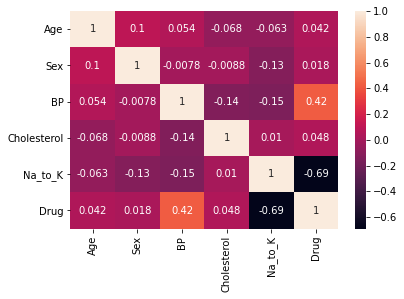

In [222]:
sb.heatmap(df.corr(), annot=True) 

# Creating the Models


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [224]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
]

In [225]:
X = df.drop(['Drug'], axis=1)
Y = df['Drug']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=1)

In [226]:
for model in models:
    model[1].fit(xtrain, ytrain)

C:\Users\Rushikesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Metrics


In [227]:
from sklearn.metrics import classification_report

In [228]:
print(models[0][0], classification_report(ytest, models[0][1].predict(xtest)), sep='\n')

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       1.00      0.75      0.86         4
           2       0.50      1.00      0.67         2
           3       1.00      0.25      0.40         4
           4       0.81      1.00      0.90        13

    accuracy                           0.85        40
   macro avg       0.85      0.78      0.75        40
weighted avg       0.89      0.85      0.84        40



In [229]:
print(models[1][0], classification_report(ytest, models[1][1].predict(xtest), zero_division=0), sep='\n')


Support Vector Machine
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.55      0.92      0.69        13

    accuracy                           0.73        40
   macro avg       0.30      0.38      0.33        40
weighted avg       0.58      0.72      0.64        40



SVM ~~is drunk~~ couldn't find drugs for some reason

In [230]:
print(models[2][0], classification_report(ytest, models[2][1].predict(xtest)), sep='\n')


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



whaaaaat?

In [231]:
print(models[3][0], classification_report(ytest, models[3][1].predict(xtest)), sep='\n')


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      0.75      0.86         4
           4       0.93      1.00      0.96        13

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.96        40
weighted avg       0.98      0.97      0.97        40



I dont know how but decision tree beat every other classificaiton algo